Importing relevant packages and modules

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import sys
from pathlib import Path

# Plotting
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('../bioAI.mplstyle')

'''
CUSTOM PACKAGES
'''
# avoid adding multiple relave paths to sys.path
sys.path.append("../src") if "../src" not in sys.path else None

from stats import *
from plotting_functions import *
from synthetic_grid_cells import *
import spatial_maps as sm

In [32]:
nx,ny = 2.2,2.2 # board size
boxsize=(nx,ny)

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, 64),
    np.linspace(-ny/2, ny/2, 64),
)
board = np.stack([xx, yy], axis=-1)
#board = np.reshape(board,(-1,2))
#board = np.reshape(board, (64,64,2))

# set grid module parameters
f = 1/0.75
# because of matrix coordinates, y-axis is flipped, which is recovered by negative orientation
orientation_offset = -20
center = np.zeros(2)
ncells=315

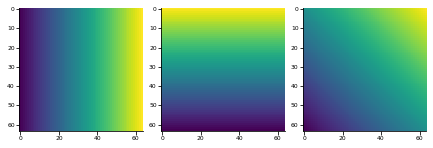

In [33]:
fig,axs = plt.subplots(ncols=3)
axs[0].imshow(board[...,0])
axs[1].imshow(board[...,1])
axs[2].imshow(np.sum(board,axis=-1))

In [5]:
gridmodule = GridModule(center,orientation_offset,f,non_negative=True)
#phases = gridmodule.inner_hexagon.sample(ncells)
phases = np.array([[0,0.4]])
gridmodule.init_module(phases)

In [6]:
ratemaps = gridmodule(board)
ratemaps.shape

(1, 64, 64)

Text(32.0, 32.0, 't')

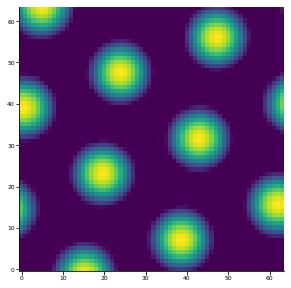

In [7]:
plt.imshow(ratemaps[0].T,origin='lower')
plt.text(*np.array(board.shape[:2])/2,'t',horizontalalignment='center',verticalalignment='center')

In [19]:
# find_peaks() actually finds peaks in CARDINAL COORDINATES
peak = sm.find_peaks(ratemaps[0])[0]
peak = tuple(peak)
#peak = tuple(peak[::-1])
peak

(43, 32)

Text(43, 32, 't')

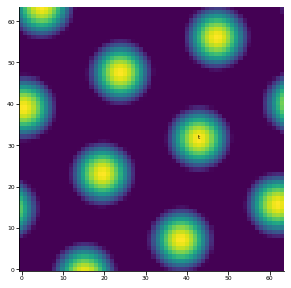

In [18]:
plt.imshow(ratemaps[0].T,origin='lower')
plt.text(*peak,'t',horizontalalignment='center',verticalalignment='center')